In [46]:
import seaborn as sns;
import pandas as pd;
import numpy as np;
from sklearn.neighbors import KNeighborsClassifier as KNN 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA # PCA = Principal Component Analysis
import matplotlib.pyplot as plt

In [14]:
iris = sns.load_dataset('iris')

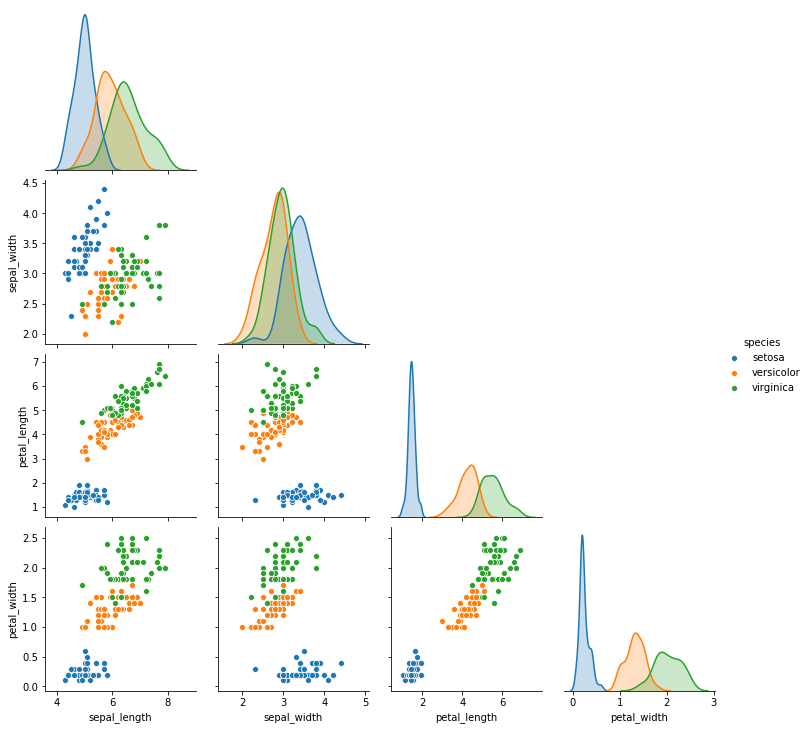

In [15]:
sns.pairplot(iris, hue='species', corner='True') # hue = variable cible

In [19]:
Y = iris['species'].astype('category').cat.codes # On veut afficher le type de fleur
X = iris.drop('species', axis='columns') # On garde que les dimension de la fleur

In [44]:
X.shape, Y.shape

((150, 4), (150,))

In [55]:
splits = train_test_split(X, Y,           # features, target
                         stratify=Y,      # Va prendre une proportion aux hasard de valeurs différentes histoire de ne pas avoir des cas où l'on a que des même valeur
                         random_state=2)  # Sert à fixer le harsard pour ne pas avoir des résultat différents à chaque tests.


In [56]:
for each in splits:
    print(each.shape)

(112, 4)
(38, 4)
(112,)
(38,)


In [57]:
X_train, X_test, Y_train, Y_test = splits #On associe chaque shape à une variable

In [58]:
# hyperparamètres n_components
pca = PCA()

In [59]:
# calibre le pca

pca.fit(X)

PCA()

In [60]:
X_tr_PCA = pca.transform(X_train)
X_te_PCA = pca.transform(X_test)

In [61]:
X_train.shape, X_test.shape, Y_train.shape, Y_train.shape

((112, 4), (38, 4), (112,), (112,))

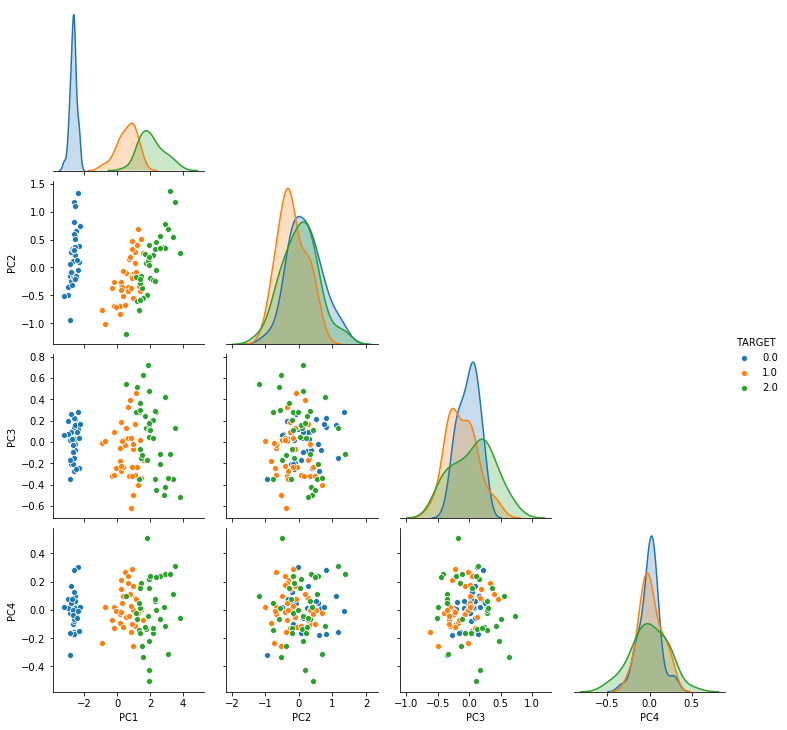

In [62]:
#purement à des fin de visualisation

data_PCA = np.append(X_tr_PCA, Y_train.to_numpy().reshape(-1, 1), axis=1) # reshape permet de prendre une shape et de le mettre sous une autre shape, avec numpy, Y_TR = (45,) et avec reshape (45,1)
iris_PCA = pd.DataFrame(data=data_PCA, columns=['PC1', 'PC2',
                                               'PC3', 'PC4','TARGET'])
sns.pairplot(iris_PCA, hue='TARGET', corner='True') # hue = variable cible

In [63]:
iris_PCA.head()

,PC1,PC2,PC3,PC4,TARGET
0,1.764346,0.078859,0.130482,-0.137001,2.0
1,1.444161,-0.143413,-0.153234,0.190996,2.0
2,-2.506947,0.645069,-0.075318,0.015020,0.0
3,-0.305584,-0.368262,-0.318492,-0.074570,1.0
4,-2.590006,0.229044,-0.080082,0.013749,0.0


Text(0.5, 1.0, 'Graphe pour choisir le nombre de PC')

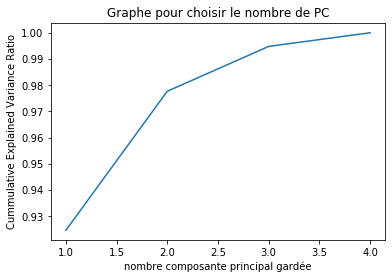

In [64]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
sns.lineplot([1,2,3,4], cumsum)
plt.xlabel('nombre composante principal gardée')
plt.ylabel('Cummulative Explained Variance Ratio')
plt.title('Graphe pour choisir le nombre de PC')

In [65]:
pca = PCA(n_components=2)

In [66]:
pca.fit(X_train)

PCA(n_components=2)

In [67]:
X_tr_PCA = pca.transform(X_train)
X_te_PCA = pca.transform(X_test)

In [68]:
X_tr_PCA.shape

(112, 2)

In [69]:
X_te_PCA.shape

(38, 2)